In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots

pd.options.mode.chained_assignment = None

# Read in the data

df = pd.read_csv('/Users/juliusrucha/Downloads/movies.csv')

In [3]:
# Look at the data for data cleaning potential

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Look for missing data and fill numeric columns with column's mean (best estimate)

missing_percentage = df.isnull().mean() * 100
print("\nPercentage of missing data in each column before:\n", missing_percentage)

df['budget'] = df['budget'].fillna(df['budget'].mean())
df['votes'] = df['votes'].fillna(df['votes'].mean())
df['gross'] = df['gross'].fillna(df['gross'].mean())
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
df['score'] = df['score'].fillna(df['score'].mean())

# Check whether it worked

missing_percentage = df.isnull().mean() * 100
print("\nPercentage of missing data in each column after:\n", missing_percentage)


Percentage of missing data in each column before:
 name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64

Percentage of missing data in each column after:
 name        0.000000
rating      1.004173
genre       0.000000
year        0.000000
released    0.026082
score       0.000000
votes       0.000000
director    0.000000
writer      0.039124
star        0.013041
country     0.039124
budget      0.000000
gross       0.000000
company     0.221701
runtime     0.000000
dtype: float64


In [5]:
# Look for data types and change them as wanted

print('Data types before: ', df.dtypes)

df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

Data types before:  name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [6]:
# The year from the 'released'-column and the year from the 'year'-column sometimes do not match. 
# The year from the 'released'-column shall be extracted as this is the reliable source

df['year_correct'] = df['released'].astype(str).str.extract(r',(.{5})')

# Drop old year column

df.drop('year', axis=1, inplace=True)

# Check whether it worked

df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [7]:
# Sort according to gross descending 
df.sort_values(by=['gross'], ascending=False, inplace=True)

# Check the data
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [8]:
# Drop any duplicates if there are

df['year_correct'] = df['year_correct'].drop_duplicates()

In [9]:
# Data cleaning done
# Look at the data for correlations

df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [10]:
# Hypothesis testing
# Hypothesis 1: the budget will be (highly) correlated to the gross
# Hypothesis 2: the company will be (highly) correlated to the gross

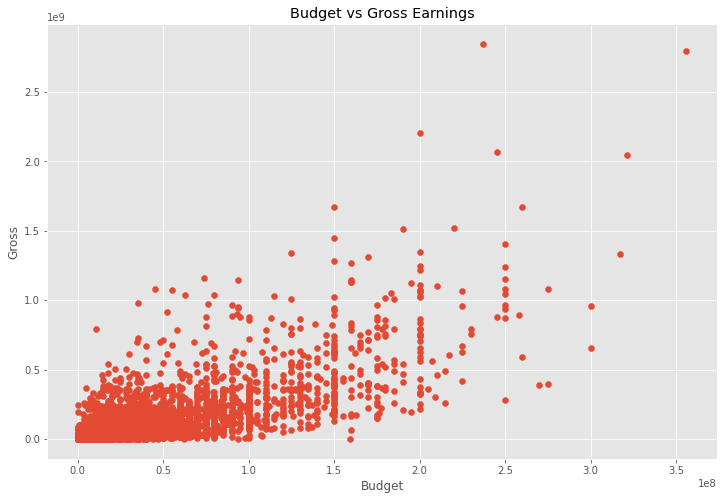

In [11]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget')

plt.ylabel('Gross')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

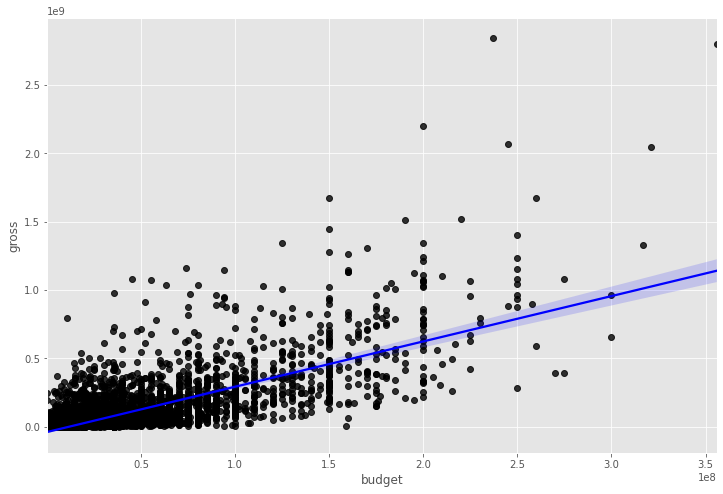

In [12]:
# Improve plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'black'}, line_kws={'color': 'blue'})

In [13]:
# Look at Correlation

df.corr()

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.064541,0.182868,0.399335
votes,0.409182,1.000000,0.421007,0.628713,0.309168
budget,0.064541,0.421007,1.000000,0.711270,0.265289
gross,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.399335,0.309168,0.265289,0.241336,1.000000


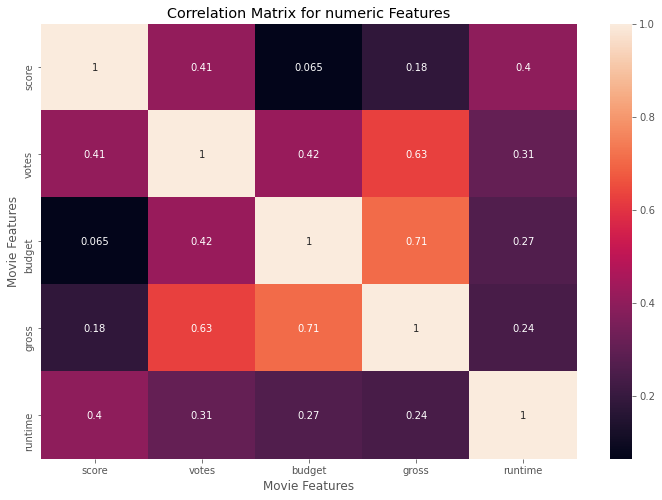

In [14]:
# Visualize correlation

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [15]:
# Look at object data types as well - numerize them in order to make them usable for correlation

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,533,5,0,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,29
7445,535,5,0,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181,39
3045,6896,5,6,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,17
6663,5144,5,0,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138,35
7244,536,5,0,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,38


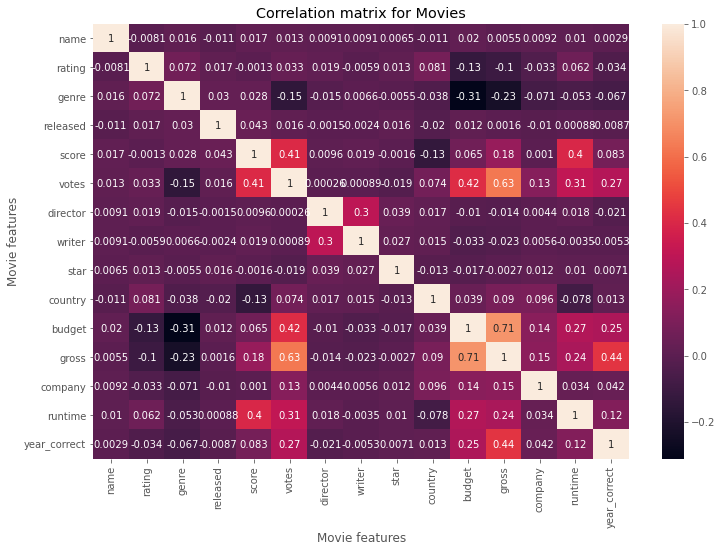

In [16]:
# Visualize

correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [17]:
# Better look at correlation values

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget        genre          -0.310566
genre         budget         -0.310566
              gross          -0.230267
gross         genre          -0.230267
genre         votes          -0.145276
                                ...   
released      released        1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
Length: 225, dtype: float64

In [18]:
# Look for high correlation

high_corr = sorted_pairs[(sorted_pairs) > 0.5 ]

high_corr

gross         votes           0.628713
votes         gross           0.628713
gross         budget          0.711270
budget        gross           0.711270
name          name            1.000000
writer        writer          1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [19]:
# Findings
# Hypothesis 1 correct: gross and budget have high correlation
# Hypothesis 2 incorrect: gross and company have no high correlation